<a href="https://colab.research.google.com/github/sumitrB/DataMining/blob/main/SimilarityDataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **First Assignment**
## Working with datasets of multiple languages to find **similarity** in text by using concept of Singling and Jaccards Similarity.

## Task A


This task analyzes a file of German sentences to compare similarities between sentences using a shingling-based approach.

In [ ]:
from itertools import combinations
import string
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns
import numpy as np

In [ ]:
# Function to make k gram shingles
def k_gram_shingling(text, k):
    shingles = set()
    for i in range(len(text) - k + 1):
        shingle = text[i:i + k]
        shingles.add(shingle)
    return shingles


In [ ]:
# Constructs character-based k-grams (2, 3, 4) and word-based tokens for each sentence.
def k_gram_representations(file_path):
    representations = {}

    # Read the file line by line
    with open(file_path, 'r', encoding='utf-8') as file:
        sentences = file.readlines()

    # Process each sentence
    for sentence in sentences:
        sentence = sentence.strip()  # Remove leading/trailing spaces or newlines

        # Character-based k-grams
        char_2_grams = k_gram_shingling(sentence, 2)
        char_3_grams = k_gram_shingling(sentence, 3)
        char_4_grams = k_gram_shingling(sentence, 4)

        # Word-based tokens
        word_tokens = sentence.split()

        # Store the results
        representations[sentence] = {
            'char_2_grams': char_2_grams,
            'char_3_grams': char_3_grams,
            'char_4_grams': char_4_grams,
            'word_tokens': word_tokens
        }

    return representations

In [ ]:
# Compute the Jaccard similarity coefficient between two sets.
def jaccard(a, b):
    set_a = set(a)
    set_b = set(b)
    return len(set_a.intersection(set_b)) / len(set_a.union(set_b))

In [ ]:
# Compute distinct k-grams, Jaccard similarity, and most similar pairs for each representation type.
def compute_statistics(representations):
    stats = {}

    # Iterate over all representation types
    for k_type in ['char_2_grams', 'char_3_grams', 'char_4_grams', 'word_tokens']:
        # Combine all k-grams into a single set to count unique k-grams
        all_grams = set().union(*[rep[k_type] for rep in representations.values()])
        distinct_k_grams = len(all_grams)

        # Compute Jaccard similarities for all sentence pairs
        similarities = []
        sentences = list(representations.keys())
        for s1, s2 in combinations(sentences, 2):
            sim = jaccard(representations[s1][k_type], representations[s2][k_type])
            similarities.append((s1, s2, sim))

        # Sort by similarity and pick the top 3 most similar pairs
        most_similar = sorted(similarities, key=lambda x: x[2], reverse=True)[:3]

        # Store the results
        stats[k_type] = {
            'distinct_k_grams': distinct_k_grams,
            'most_similar': most_similar
        }

    return stats

In [ ]:
file_path = "/content/drive/MyDrive/DataMining/Asgn1/A_bunch_of_German_sentences.txt"

# Step 1: Generate k-gram and word-based representations
representations = k_gram_representations(file_path)

# Step 2: Compute statistics and similarities
stats = compute_statistics(representations)

# Step 3: Print Results
for k_type, data in stats.items():
    print(f"Representation Type: {k_type}")
    print(f"Number of Distinct k-grams: {data['distinct_k_grams']}")
    print("Top 3 Most Similar Sentence Pairs:")
    print("  Sentences: ")
    for pair in data['most_similar']:
        print(f"  {pair[0]}, {pair[1]} \n   Similarity: {pair[2]:.4f}")
    print("-------------------------------------------------")

Representation Type: char_2_grams
Number of Distinct k-grams: 672
Top 3 Most Similar Sentence Pairs:
  Sentences: 
  In der Sternwarte beobachtete der Astronom durch das leistungsstarke Teleskop einen neu entdeckten Kometen, der sich der Erde näherte., In der Sternwarte beobachtete der Astronom einen neu entdeckten Kometen, der sich der Erde näherte. 
   Similarity: 0.7126
  In der Sternwarte beobachtete der Astronom durch das leistungsstarke Teleskop einen neu entdeckten Kometen, der sich der Erde näherte., In der Sternwarte justierte der Astronom das leistungsstarke Teleskop, um einen neu entdeckten Exoplaneten zu beobachten. 
   Similarity: 0.6699
  Die Modedesignerin skizzierte eifrig ihre Ideen für die nächste Kollektion, inspiriert von den Farben und Formen der Natur., Die Modedesignerin skizzierte eifrig ihre Ideen für die kommende Herbstkollektion, inspiriert von den Farben des Waldes im Herbst. 
   Similarity: 0.6635
-------------------------------------------------
Representa

## Task B
This task analyzes the similarities between English, French, and Spanish sentence datasets using Jaccard similarity. By constructing k-grams (character-based and word-based) and comparing overlaps between datasets, we measured how closely the languages resemble each other. Visual aids like Venn diagrams and bar graphs were used to illustrate the findings.

In [ ]:
# Load and preprocess text from a file.
def preprocess_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        sentences = file.readlines()

    # Combine sentences into a single string
    combined_text = " ".join(sentences)

    # Normalize text: lowercase and remove punctuation
    normalized_text = combined_text.lower().translate(str.maketrans("", "", string.punctuation))

    return normalized_text

In [ ]:
# Load and preprocess the text for each language
english_text = preprocess_text("/content/drive/MyDrive/DataMining/Asgn1/100_English_sentences.txt")
french_text = preprocess_text("/content/drive/MyDrive/DataMining/Asgn1/100_French_sentences.txt")
spanish_text = preprocess_text("/content/drive/MyDrive/DataMining/Asgn1/100_Spanish_sentences.txt")

In [ ]:
# Generate k-grams for each language
k = 4
english_shingles = k_gram_shingling(english_text, k)
french_shingles = k_gram_shingling(french_text, k)
spanish_shingles = k_gram_shingling(spanish_text, k)

In [ ]:
# Compute pairwise Jaccard similarities
similarity_english_french = jaccard(english_shingles, french_shingles)
similarity_english_spanish = jaccard(english_shingles, spanish_shingles)
similarity_french_spanish = jaccard(french_shingles, spanish_shingles)

In [ ]:
# Report the results
print("Jaccard Similarities:")
print(f"English vs French: {similarity_english_french:.4f}")
print(f"English vs Spanish: {similarity_english_spanish:.4f}")
print(f"French vs Spanish: {similarity_french_spanish:.4f}")

# Determine the most similar pair
similarities = {
    "English-French": similarity_english_french,
    "English-Spanish": similarity_english_spanish,
    "French-Spanish": similarity_french_spanish,
}

most_similar_pair = max(similarities, key=similarities.get)
print(f"The most similar pair of languages is: {most_similar_pair}")

Jaccard Similarities:
English vs French: 0.1851
English vs Spanish: 0.1606
French vs Spanish: 0.1648
The most similar pair of languages is: English-French


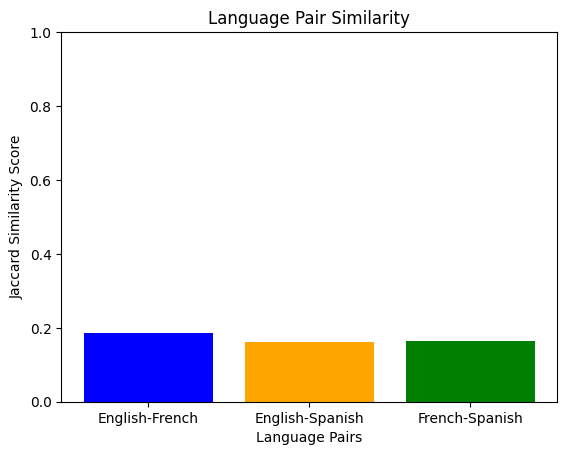

In [ ]:
# Data for visualization
language_pairs = ["English-French", "English-Spanish", "French-Spanish"]
similarity_scores = [similarity_english_french, similarity_english_spanish, similarity_french_spanish]

# Plot the bar chart
plt.bar(language_pairs, similarity_scores, color=['blue', 'orange', 'green'])
plt.title("Language Pair Similarity")
plt.ylabel("Jaccard Similarity Score")
plt.xlabel("Language Pairs")
plt.ylim(0, 1)
plt.show()

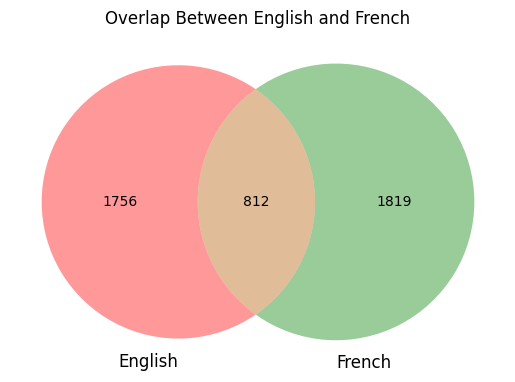

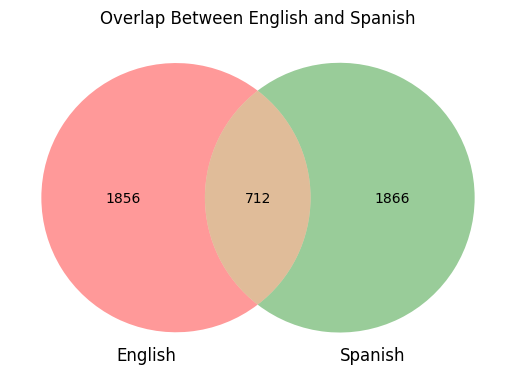

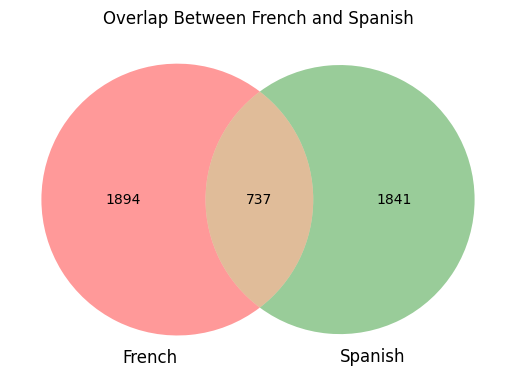

In [ ]:
# Example for English and French
venn2([english_shingles, french_shingles], ('English', 'French'))
plt.title("Overlap Between English and French")
plt.show()

venn2([english_shingles, spanish_shingles], ('English', 'Spanish'))
plt.title("Overlap Between English and Spanish")
plt.show()

venn2([french_shingles, spanish_shingles], ('French', 'Spanish'))
plt.title("Overlap Between French and Spanish")
plt.show()

## Conclusion
Based on the Jaccard similarity scores, we found that **English and French** are the most similar languages in our dataset, with a **similarity score of 0.1851**. This indicates that English and French sentences share more common patterns or words compared to the other language pairs.

French and Spanish, as well as English and Spanish, have slightly lower similarity scores (0.1648 and 0.1606, respectively), showing less overlap in their structures or vocabulary.

The Venn diagrams visually highlight these overlaps, and the bar graphs make it clear that English and French have the highest similarity, supporting our conclusion.

This analysis suggests that English and French are closer in language patterns within the provided dataset.